# Pymaceuticals Inc.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = mouse_study_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_index = mouse_study_df.set_index("Mouse ID")
mouse_study_cleaned = mouse_index.drop(["g989"])
mouse_study_cleaned

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
study_index_reset = mouse_study_cleaned.reset_index()
cleaned_mice_count = study_index_reset["Mouse ID"].nunique()
cleaned_mice_count

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_study_cleaned['Tumor Volume (mm3)'].groupby(mouse_study_cleaned['Drug Regimen']).mean()
median = mouse_study_cleaned['Tumor Volume (mm3)'].groupby(mouse_study_cleaned['Drug Regimen']).median()
variance = mouse_study_cleaned['Tumor Volume (mm3)'].groupby(mouse_study_cleaned['Drug Regimen']).var()
stdev = mouse_study_cleaned['Tumor Volume (mm3)'].groupby(mouse_study_cleaned['Drug Regimen']).std()
sem = mouse_study_cleaned['Tumor Volume (mm3)'].groupby(mouse_study_cleaned['Drug Regimen']).sem()

stat_mice_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":stdev, 
                           "Tumor Volume Std. Err.":sem})
stat_mice_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# SKIP

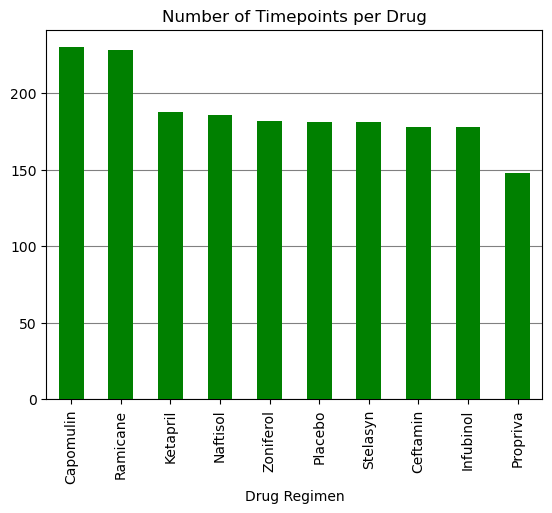

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Counting number of timepoints per drug
timepoint_count = mouse_study_cleaned.groupby(["Drug Regimen"])["Timepoint"].count()


# Sort values so bar chart is organized in descending order.
sorted_mice = timepoint_count.sort_values(ascending=False)


# zorder allows you to determine what goes 'in front' - the higher the number, the more in front the item is.
pandas_mice_viz = sorted_mice.plot.bar(x="Drug Regimen", y="Number of Timepoints", title="Number of Timepoints per Drug",
                                           color="g", width=0.5, zorder=3) 


# Adding a horizontal grid behind bars for better aesthetics
pandas_mice_viz.grid(axis='y', color="gray", zorder=0)

Text(0.5, 1.0, 'Number of Timepoints per Treatment')

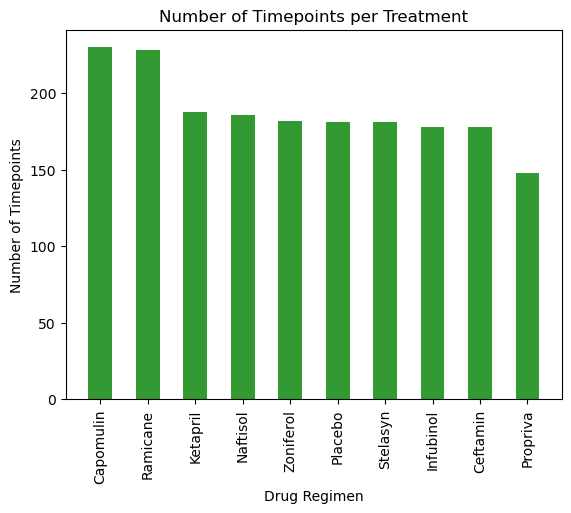

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_count_pyplot = mouse_study_cleaned["Drug Regimen"].value_counts()

x_axis = timepoint_count_pyplot.index.values
y_axis = timepoint_count_pyplot.values
plt.bar(x_axis, y_axis, width=0.5, color="g", alpha=0.8, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints per Treatment")

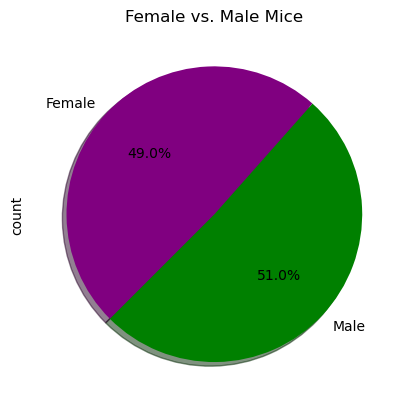

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Using value_counts() allows me to find the proportion of sexes of the population of mice in the study.
sex_data = mouse_study_cleaned["Sex"].value_counts()
colors = ["green", "purple"]
sex_data.plot.pie(autopct= "%1.1f%%", shadow=True, startangle=225, colors=colors)
plt.title("Female vs. Male Mice")
plt.show()

Text(0.5, 1.0, 'Female vs. Male Mice')

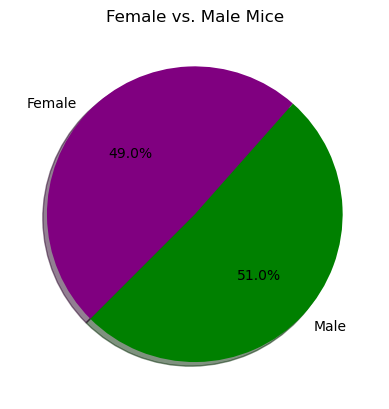

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=225, colors=colors, shadow=True)
plt.title('Female vs. Male Mice')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Used groupby on Mouse ID to identify max timepoints for each. Turned it into a dataframe to merge

ID_timepoints = pd.DataFrame(mouse_study_cleaned.groupby(["Mouse ID"])["Timepoint"].max())



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint. Merging on right 
#    so that it adds only the max timepoints.
max_timepoint_df = pd.merge(mouse_study_cleaned, ID_timepoints, on=("Mouse ID", "Timepoint"), how="right")
max_timepoint_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # create a new dataframe that focuses on the unique values in the drug regimen column
    top_four = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == treatment]
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes, then append to empty list.
    vol_values = top_four["Tumor Volume (mm3)"]
    tumor_vol.append(vol_values)

    
    # Determine outliers using upper and lower bounds
    quartiles = vol_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {treatment}, values below {lower_bound} are outliers")
    print(f"For {treatment}, values above {upper_bound} are outliers")


For Capomulin, values below 20.70456164999999 are outliers
For Capomulin, values above 51.83201549 are outliers
For Ramicane, values below 17.912664470000003 are outliers
For Ramicane, values above 54.30681135 are outliers
For Infubinol, values below 36.83290494999999 are outliers
For Infubinol, values above 82.74144559000001 are outliers
For Ceftamin, values below 25.355449580000002 are outliers
For Ceftamin, values above 87.66645829999999 are outliers


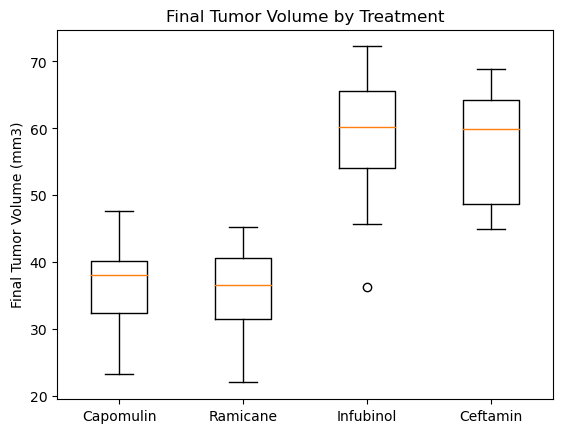

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol)

plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots


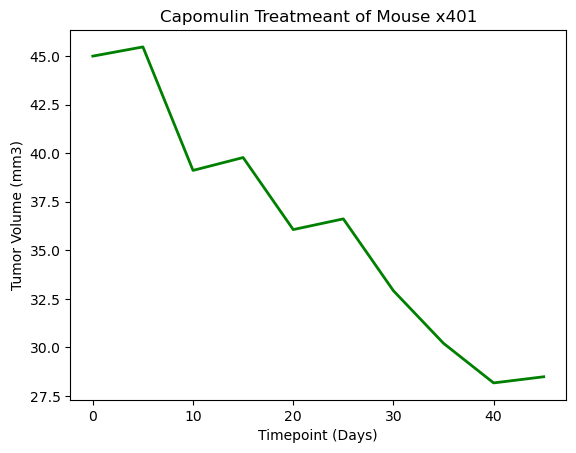

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Reset index to access Mouse ID column, created a dataframe using the .loc() function and filtered to find x401 data
mouse_cleaned2 = mouse_study_cleaned.reset_index()
mouse_df = mouse_cleaned2.loc[mouse_cleaned2["Mouse ID"] == "x401",:]

x_axis = mouse_df["Timepoint"] 
y_axis = mouse_df["Tumor Volume (mm3)"] 

plt.plot(x_axis, y_axis, linewidth=2, markersize=12, color="g") 
plt.title("Capomulin Treatmeant of Mouse x401")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


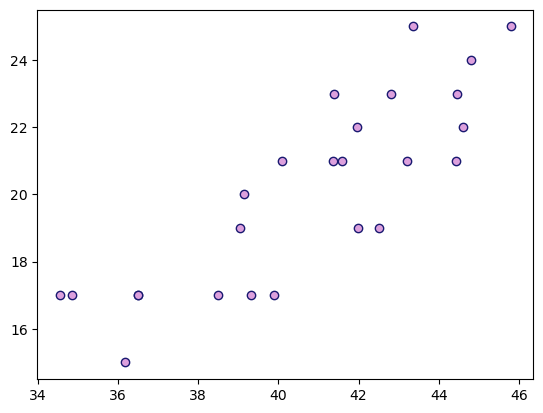

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# create dataframe using .loc() to filter for Capomulin treatment
mouse_cap_df = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]

x_values = mouse_cap_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
y_values = mouse_cap_df.groupby(["Mouse ID"])["Weight (g)"].mean()

plt.scatter(x_values, y_values, color="plum", edgecolors="midnightblue")
#plt.xlabel("Weight (g)")
#plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [14]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
